In [19]:
from netCDF4 import Dataset
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy.signal import argrelextrema
import pickle
import warnings

In [2]:
directory = '../data/ncs'

In [3]:
def get_time_ticks(times):
    seconds = [t.second for t in times]
    hours = [t.hour for t in times]
    minutes = [t.minute for t in times]
    time_ticks = [f'{h}:{str(m).zfill(2)}:{str(s).zfill(2)}' for h,m,s in zip(hours, minutes, seconds)]
    return time_ticks

pits = {}

def plot_file(f,band):
    
    if band.lower()=='ka':
        
        skipper = 100
        ylims = (1000,570)
        
    elif band.lower()=='ku':
        skipper=40
        ylims = (600,400)
        
    else:raise
    
    with Dataset(f'{directory}/{f}') as d:
        ranges = np.array(d['range'])
        times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x)) for x in d['start_time']])

        time_ticks = get_time_ticks(times)

        hh = np.array(d['hh_power_decon0'])
        vv = np.array(d['vv_power_decon0'])

        plt.figure(figsize=(10,4))
        plt.imshow(np.log(hh),aspect='auto')
        plt.xticks(np.arange(0,hh.shape[1],skipper),labels=time_ticks[::skipper],rotation=90)

        plt.yticks(np.arange(0,hh.shape[0],skipper),labels=ranges[::skipper])

        plt.ylim(ylims[0],ylims[1])
        plt.show()

# PIT 1

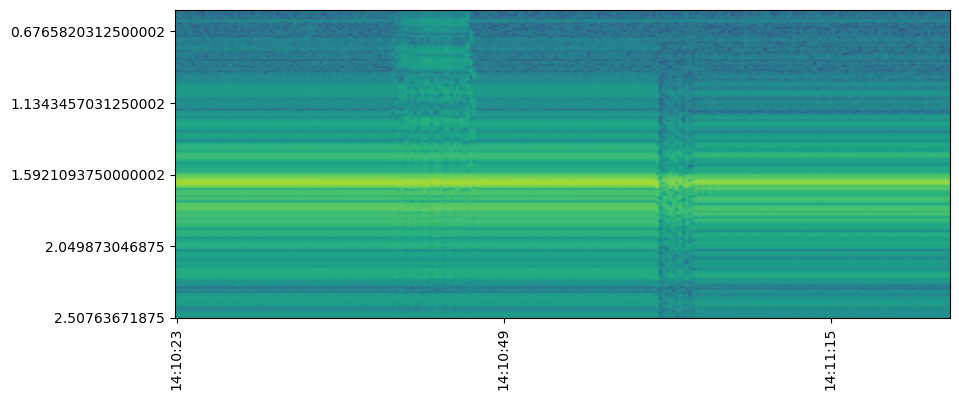

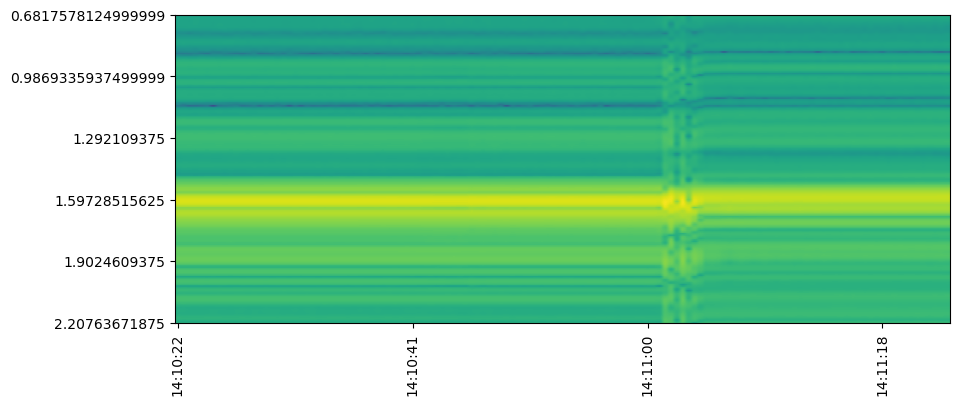

In [4]:
f = 'kuka_stare_decon_Ka-Scat20230815-141023.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230815-141022.nc'

plot_file(f,'ku')

In [5]:
pitno = 1
pits[pitno] = {}
pits[pitno]['ka'] = ((14,10,25),(14,10,30))
pits[pitno]['ku'] = ((14,11,15),(14,11,20))
pits[pitno]['file'] = f

# PIT 2

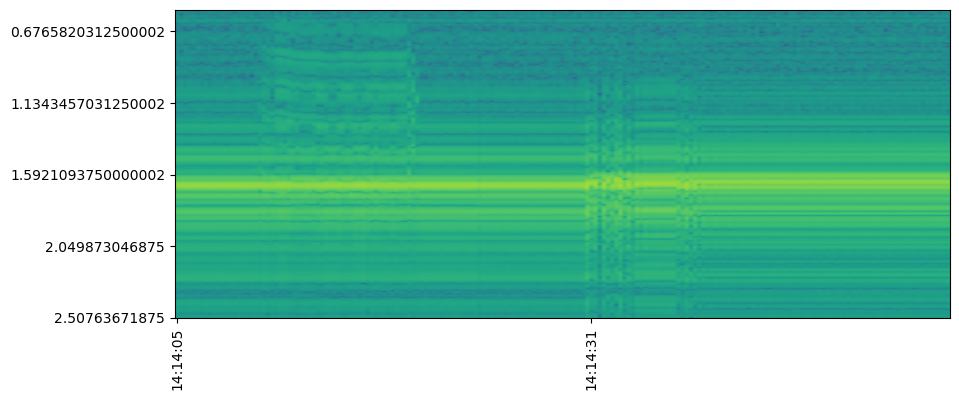

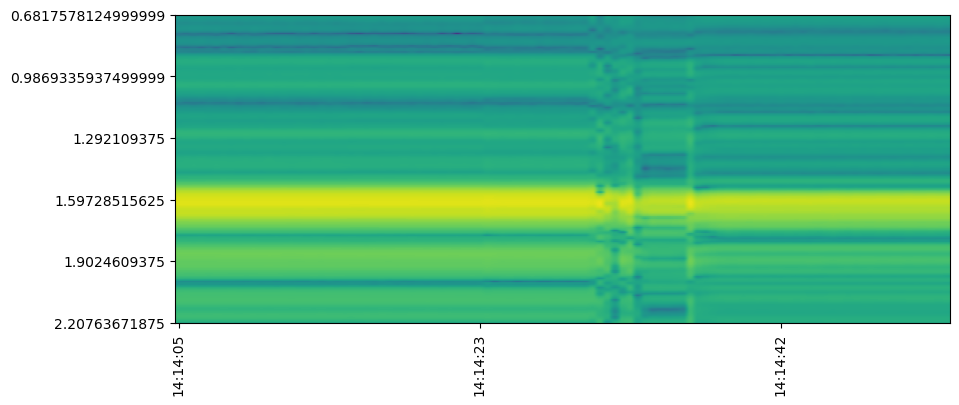

In [6]:
f = 'kuka_stare_decon_Ka-Scat20230815-141405.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230815-141405.nc'

plot_file(f,'ku')

In [7]:
pitno=2
pits[pitno] = {}
pits[pitno]['ka'] = ((14,14,5),(14,14,10))
pits[pitno]['ku'] = ((14,14,42),(14,14,47))
pits[pitno]['file'] = f

# PIT 3

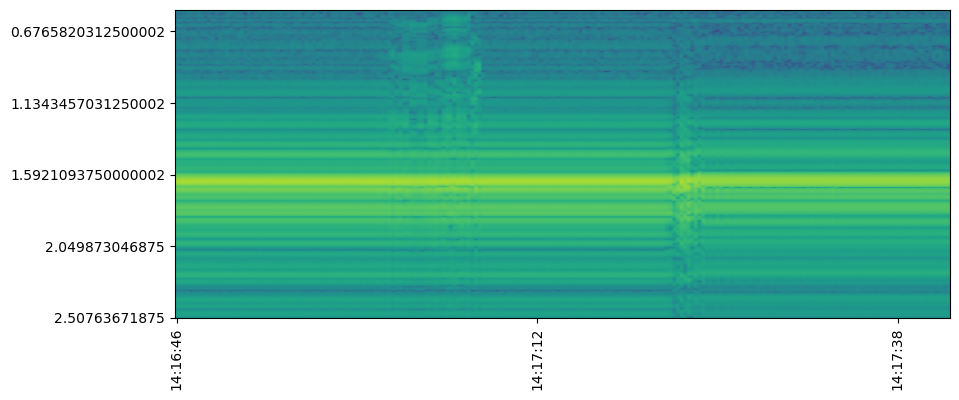

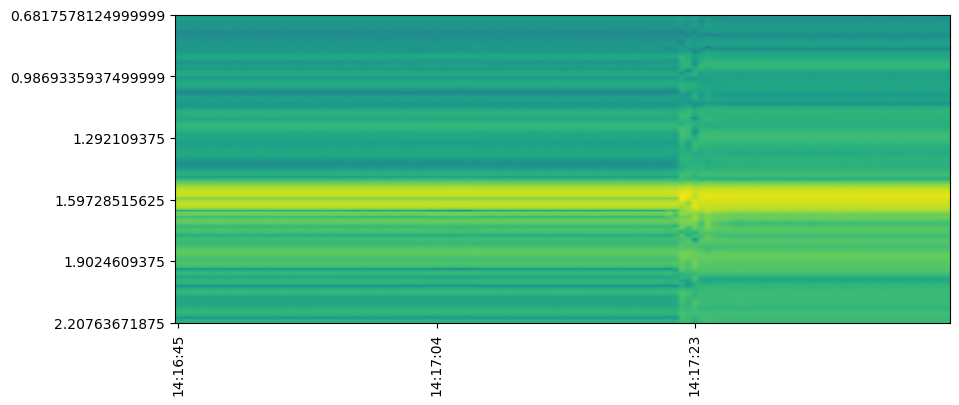

In [8]:
f = 'kuka_stare_decon_Ka-Scat20230815-141646.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230815-141645.nc'

plot_file(f,'ku')

In [9]:
pitno=3
pits[pitno] = {}
pits[pitno]['ka'] = ((14,16,46),(14,16,51))
pits[pitno]['ku'] = ((14,17,25),(14,17,30))
pits[pitno]['file'] = f

# Pit 4

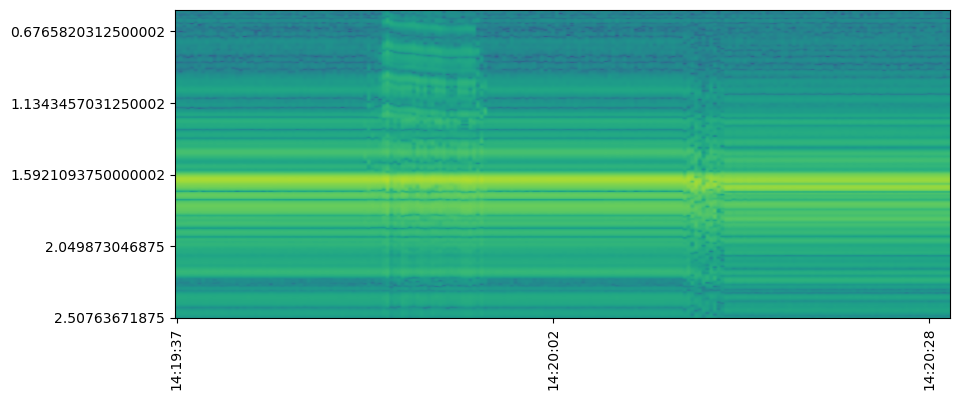

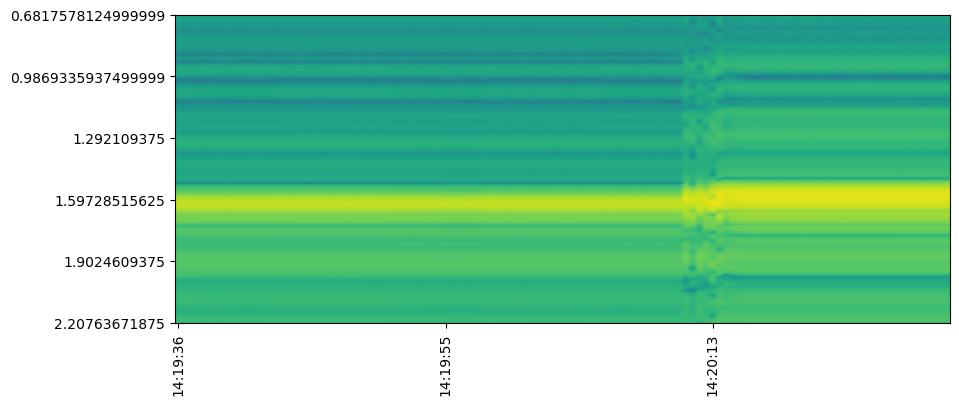

In [10]:
f = 'kuka_stare_decon_Ka-Scat20230815-141937.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230815-141936.nc'

plot_file(f,'ku')

In [11]:
pitno=4
pits[pitno] = {}
pits[pitno]['ka'] = ((14,19,38),(14,19,43))
pits[pitno]['ku'] = ((14,20,18),(14,20,23))
pits[pitno]['file'] = f

# Pit 5

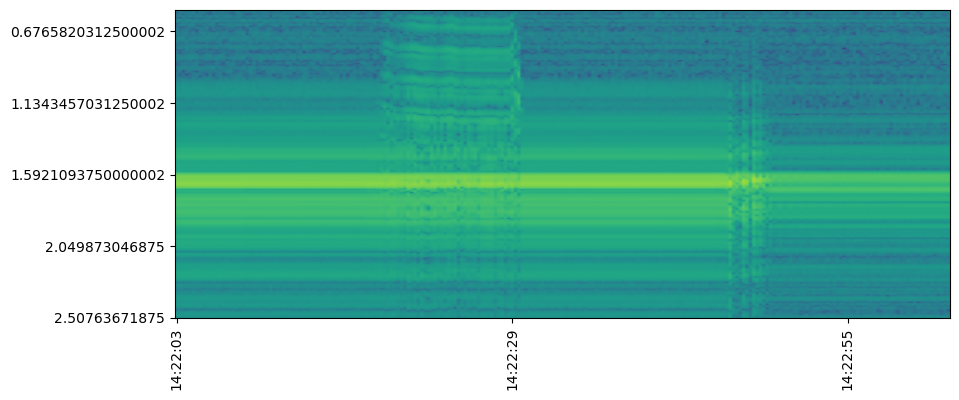

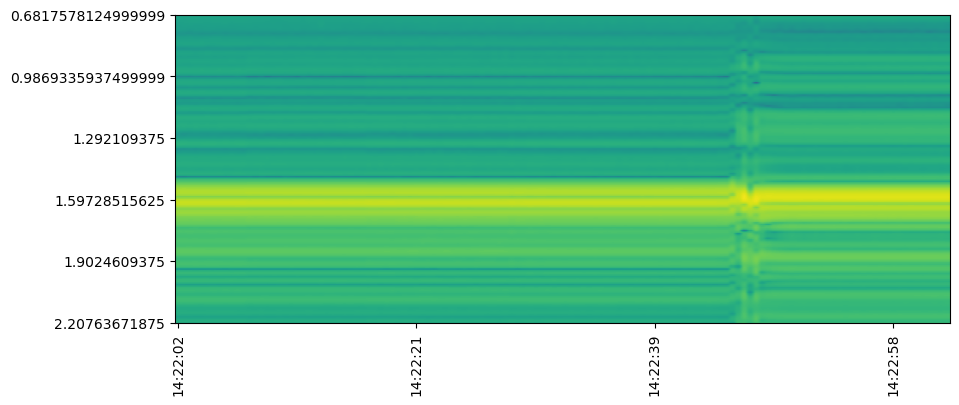

In [12]:
f = 'kuka_stare_decon_Ka-Scat20230815-142203.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230815-142202.nc'

plot_file(f,'ku')

In [13]:
pitno=5
pits[pitno] = {}
pits[pitno]['ka'] = ((14,22,5),(14,22,10))
pits[pitno]['ku'] = ((14,22,54),(14,22,59))
pits[pitno]['file'] = f

# Pit 6

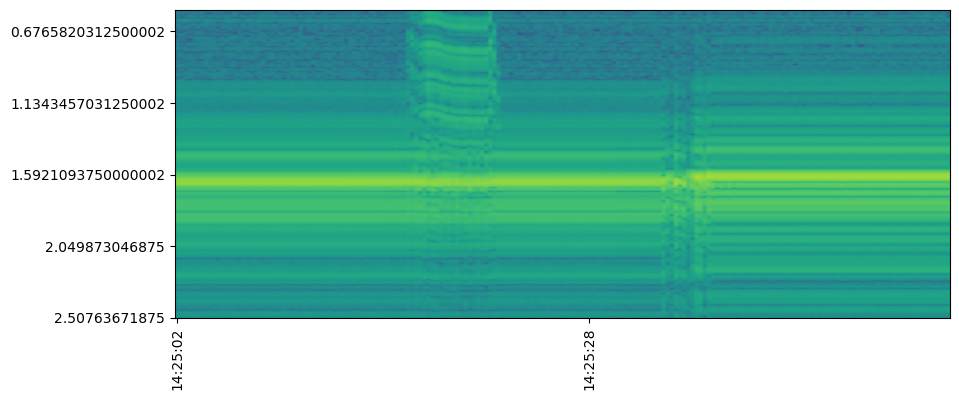

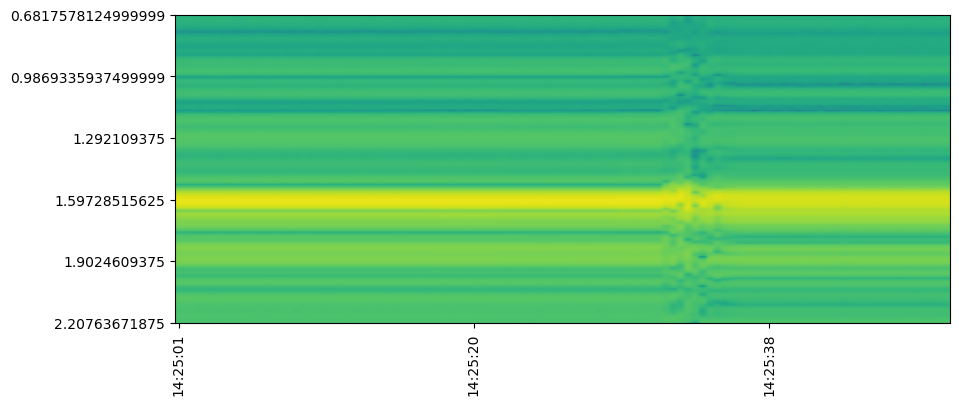

In [14]:
f = 'kuka_stare_decon_Ka-Scat20230815-142502.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230815-142501.nc'

plot_file(f,'ku')

In [15]:
pitno=6
pits[pitno] = {}
pits[pitno]['ka'] = ((14,25,2),(14,25,7))
pits[pitno]['ku'] = ((14,25,38),(14,25,43))
pits[pitno]['file'] = f

# Pit 7

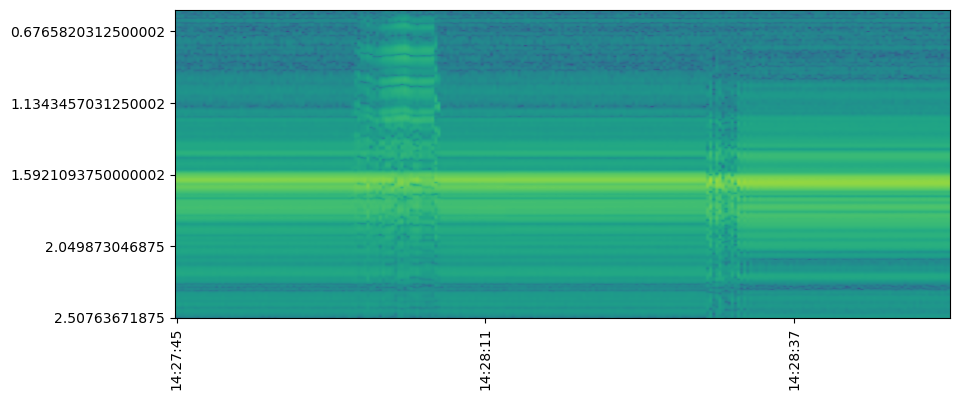

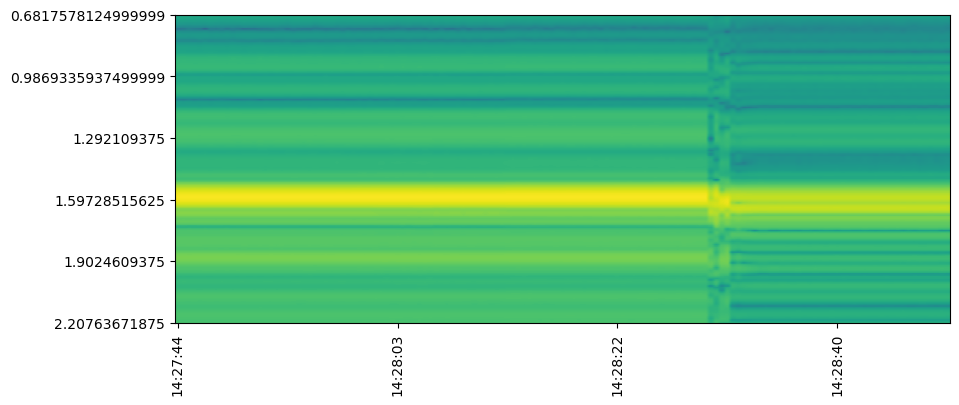

In [22]:
f = 'kuka_stare_decon_Ka-Scat20230815-142745.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230815-142744.nc'

plot_file(f,'ku')

In [23]:
pitno=7
pits[pitno] = {}
pits[pitno]['ka'] = ((14,27,46),(14,27,51))
pits[pitno]['ku'] = ((14,28,40),(14,28,45))
pits[pitno]['file'] = f

# Metal Plate Shot

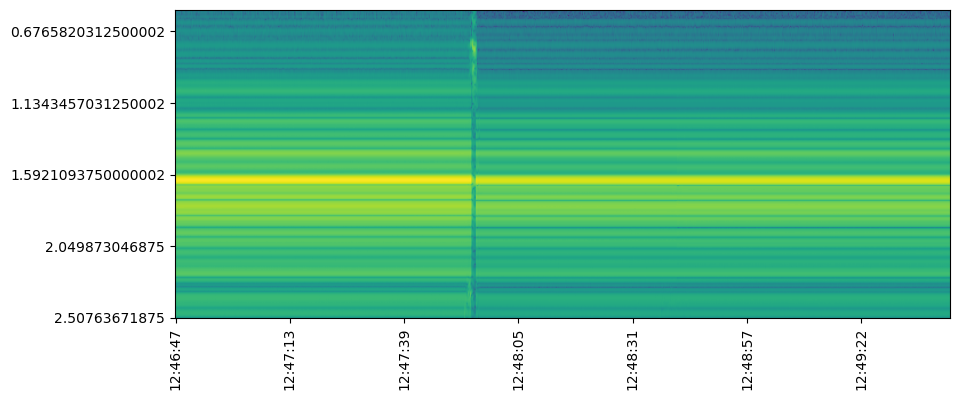

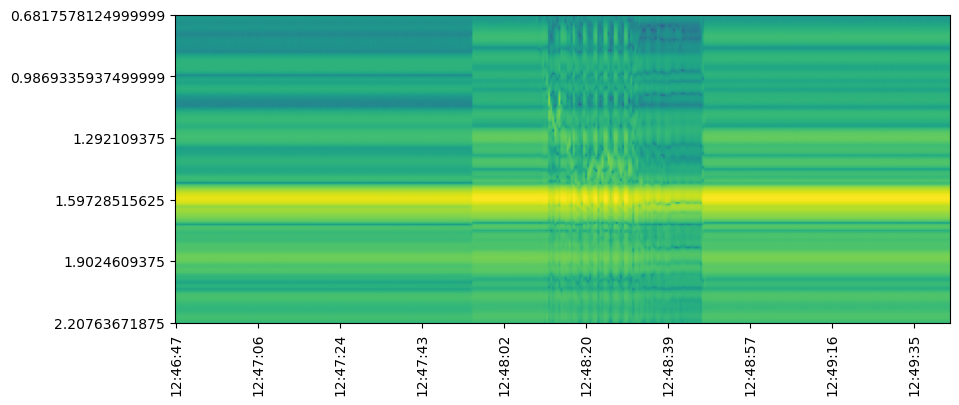

In [16]:
f = 'kuka_stare_decon_Ka-Scat20230824-124647.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230824-124647.nc'

plot_file(f,'ku')

In [17]:
pitno=999
pits[pitno] = {}
pits[pitno]['ka'] = ((12,47,0),(12,47,10))
pits[pitno]['ku'] = ((12,48,30),(12,48,40))
pits[pitno]['file'] = f

In [18]:
pickle.dump(pits,open('../data/pickles/kuka_pits.p','wb'))